In [1]:
import numpy as np
import pandas as pd

## Data manipulations

### 1) pandas.melt

In [2]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})

df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [3]:
pd.melt(frame=df, id_vars=['A'], value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [4]:
pd.melt(frame=df, id_vars=['A'], value_vars=['B', 'C'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [5]:
# The names of ‘variable’ and ‘value’ columns can be customized

pd.melt(frame=df, id_vars=['A'], value_vars=['B'],
        var_name='myVarname', value_name='myValname')

,A,myVarname,myValname
0,a,B,1
1,b,B,3
2,c,B,5


In [6]:
# Original index values can be kept around

pd.melt(frame=df, id_vars=['A'], value_vars=['B', 'C'], ignore_index=False)

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
0,a,C,2
1,b,C,4
2,c,C,6


In [7]:
# If you have multi-index columns:

df.columns = [list('ABC'), list('DEF')]

In [8]:
pd.melt(df, col_level=0, id_vars=['A'], value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [9]:
pd.melt(df, id_vars=[('A', 'D')], value_vars=[('B', 'E')])

,"(A, D)",variable_0,variable_1,value
0,a,B,E,1
1,b,B,E,3
2,c,B,E,5


### 2) pandas.pivot

In [10]:
# pandas.pivot(data, index=None, columns=None, values=None)


df2 = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

df2

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [11]:
# This is one way

# df2.pivot(index='foo', columns='bar', values='baz')


pd.pivot(data=df2, index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [12]:
pd.pivot(data=df2, index='foo', columns='bar')['baz']

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [13]:
pd.pivot(data=df2, index='foo', columns='bar', values=['baz', 'zoo'])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [14]:
# You could also assign a list of column names or a list of index names.

df3 = pd.DataFrame({
       "lev1": [1, 1, 1, 2, 2, 2],
       "lev2": [1, 1, 2, 1, 1, 2],
       "lev3": [1, 2, 1, 2, 1, 2],
       "lev4": [1, 2, 3, 4, 5, 6],
       "values": [0, 1, 2, 3, 4, 5]})
df3

,lev1,lev2,lev3,lev4,values
0,1,1,1,1,0
1,1,1,2,2,1
2,1,2,1,3,2
3,2,1,2,4,3
4,2,1,1,5,4
5,2,2,2,6,5


In [15]:
df3.pivot(index="lev1", columns=["lev2", "lev3"], values="values")

lev2    1         2     
lev3    1    2    1    2
lev1                    
1     0.0  1.0  2.0  NaN
2     4.0  3.0  NaN  5.0

In [16]:
df3.pivot(index=["lev1", "lev2"], columns=["lev3"], values="values")

lev3         1    2
lev1 lev2          
1    1     0.0  1.0
     2     2.0  NaN
2    1     4.0  3.0
     2     NaN  5.0

In [17]:
df4 = pd.read_csv('Dataset/weather.csv')
df4

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,66,58
2,5/3/2017,new york,68,60
3,5/1/2017,mumbai,75,80
4,5/2/2017,mumbai,78,83
5,5/3/2017,mumbai,82,85
6,5/1/2017,beijing,80,26
7,5/2/2017,beijing,77,30
8,5/3/2017,beijing,79,35


In [18]:
pd.pivot(data=df4, index='city', columns='date')

temperature                   humidity                  
date        5/1/2017 5/2/2017 5/3/2017 5/1/2017 5/2/2017 5/3/2017
city                                                             
beijing           80       77       79       26       30       35
mumbai            75       78       82       80       83       85
new york          65       66       68       56       58       60

In [19]:
pd.pivot(data=df4, index='city', columns='date', values='temperature')

date,5/1/2017,5/2/2017,5/3/2017
city,,,
beijing,80,77,79
mumbai,75,78,82
new york,65,66,68


In [20]:
pd.pivot(data=df4, index='city', columns='date', values='humidity')

date,5/1/2017,5/2/2017,5/3/2017
city,,,
beijing,26,30,35
mumbai,80,83,85
new york,56,58,60


In [21]:
pd.pivot(data=df4, index='date', columns='city')

temperature                 humidity                
city         beijing mumbai new york  beijing mumbai new york
date                                                         
5/1/2017          80     75       65       26     80       56
5/2/2017          77     78       66       30     83       58
5/3/2017          79     82       68       35     85       60

### 3) pandas.pivot_table

In [22]:
# pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, 
                     # dropna=True, margins_name='All', observed=False, sort=True)
    
df5 = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df5

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [23]:
pd.pivot_table(data=df5, values='D', index=['A', 'B'], columns=['C'], aggfunc=np.sum)

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [24]:
# We can also fill missing values using the fill_value parameter.

table = pd.pivot_table(df5, values='D', index=['A', 'B'],
                    columns=['C'], aggfunc=np.sum, fill_value=0)
table

C        large  small
A   B                
bar one      4      5
    two      7      6
foo one      4      1
    two      0      6

In [25]:
# The next example aggregates by taking the mean across multiple columns.

table = pd.pivot_table(df5, values=['D', 'E'], index=['A', 'C'],
                    aggfunc={'D': np.mean,
                             'E': np.mean})
table

D         E
A   C                        
bar large  5.500000  7.500000
    small  5.500000  8.500000
foo large  2.000000  4.500000
    small  2.333333  4.333333

In [26]:
# We can also calculate multiple types of aggregations for any given value column.

table = pd.pivot_table(df5, values=['D', 'E'], index=['A', 'C'],
                    aggfunc={'D': np.mean,
                             'E': [min, max, np.mean]})
table

D   E              
               mean max      mean min
A   C                                
bar large  5.500000   9  7.500000   6
    small  5.500000   9  8.500000   8
foo large  2.000000   5  4.500000   4
    small  2.333333   6  4.333333   2

In [27]:
df6 = pd.read_csv("Dataset/weather2.csv")
df6

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,61,54
2,5/2/2017,new york,70,60
3,5/2/2017,new york,72,62
4,5/1/2017,mumbai,75,80
5,5/1/2017,mumbai,78,83
6,5/2/2017,mumbai,82,85
7,5/2/2017,mumbai,80,26


In [28]:
pd.pivot_table(data=df6, index='city', columns='date')

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai       81.5     55.5        76.5     81.0
new york     55.0     61.0        63.0     71.0

### 4) pandas.concat

In [29]:
# pandas.concat(objs, axis=0, join='outer', ignore_index=False, keys=None, 
#               levels=None, names=None, verify_integrity=False, sort=False, copy=True)

# Combine two Series.

s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])

pd.concat(objs=[s1, s2])

0    a
1    b
0    c
1    d
dtype: object

In [30]:
pd.concat(objs=[s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

In [31]:
# Add a hierarchical index at the outermost level of the data with the keys option.

pd.concat(objs=[s1, s2], keys=['s1', 's2'])

s1  0    a
    1    b
s2  0    c
    1    d
dtype: object

In [32]:
# Label the index keys you create with the names option.

pd.concat(objs=[s1, s2], keys=['s1', 's2'],
          names=['Series name', 'Row ID'])

Series name  Row ID
s1           0         a
             1         b
s2           0         c
             1         d
dtype: object

In [33]:
# Combine two DataFrame objects with identical columns.

df7 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df7

,letter,number
0,a,1
1,b,2


In [34]:
df8 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])
df8

,letter,number
0,c,3
1,d,4


In [35]:
pd.concat(objs=[df7, df8])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [36]:
pd.concat(objs=[df7, df8], ignore_index=True)

,letter,number
0,a,1
1,b,2
2,c,3
3,d,4


In [38]:
# Combine DataFrame objects horizontally along the x axis by passing in axis=1.

df9 = pd.DataFrame([['bird', 'polly'], ['monkey', 'george']],
                   columns=['animal', 'name'])

df9

,animal,name
0,bird,polly
1,monkey,george


In [39]:
pd.concat(objs=[df7, df9], axis=1)

,letter,number,animal,name
0,a,1,bird,polly
1,b,2,monkey,george


In [40]:
india_weather = pd.DataFrame({
    "city": ["mumbai","delhi","banglore"],
    "temperature": [32,45,30],
    "humidity": [80, 60, 78]
})
india_weather

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [41]:
us_weather = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
    "humidity": [68, 65, 75]
})
us_weather

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [42]:
df10 = pd.concat([india_weather, us_weather], keys=["india", "us"])
df10

city  temperature  humidity
india 0    mumbai           32        80
      1     delhi           45        60
      2  banglore           30        78
us    0  new york           21        68
      1   chicago           14        65
      2   orlando           35        75

In [44]:
df10.loc['india']

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


### 5) pandas.get_dummies

In [45]:
# pandas.get_dummies(data, prefix=None, prefix_sep='_', 
#                    dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

# Convert categorical variable into dummy/indicator variables.

s = pd.Series(data=list('abcd'))
s

0    a
1    b
2    c
3    d
dtype: object

In [46]:
pd.get_dummies(data=s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [47]:
s1 = ['a', 'b', np.nan]

pd.get_dummies(data=s1)

,a,b
0,1,0
1,0,1
2,0,0


In [48]:
pd.get_dummies(data=s1, dummy_na=True)

,a,b,NaN
0,1,0,0
1,0,1,0
2,0,0,1


In [49]:
df11 = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
                   'C': [1, 2, 3]})

df11

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [50]:
pd.get_dummies(data=df11, prefix=['col1', 'col2'])

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [51]:
# Create a Single Dummy Variable

df12 = pd.DataFrame({'income': [45, 48, 54, 57, 65, 69, 78],
                   'age': [23, 25, 24, 29, 38, 36, 40],
                   'gender': ['M', 'F', 'M', 'F', 'F', 'F', 'M']})

df12

,income,age,gender
0,45,23,M
1,48,25,F
2,54,24,M
3,57,29,F
4,65,38,F
5,69,36,F
6,78,40,M


In [52]:
pd.get_dummies(data=df12, columns=['gender'])

,income,age,gender_F,gender_M
0,45,23,0,1
1,48,25,1,0
2,54,24,0,1
3,57,29,1,0
4,65,38,1,0
5,69,36,1,0
6,78,40,0,1


In [53]:
pd.get_dummies(data=df12, columns=['gender'], drop_first=True)

,income,age,gender_M
0,45,23,1
1,48,25,0
2,54,24,1
3,57,29,0
4,65,38,0
5,69,36,0
6,78,40,1


In [54]:
# Create Multiple Dummy Variables

df13 = pd.DataFrame({'income': [45, 48, 54, 57, 65, 69, 78],
                   'age': [23, 25, 24, 29, 38, 36, 40],
                   'gender': ['M', 'F', 'M', 'F', 'F', 'F', 'M'],
                   'college': ['Y', 'N', 'N', 'N', 'Y', 'Y', 'Y']})

df13

,income,age,gender,college
0,45,23,M,Y
1,48,25,F,N
2,54,24,M,N
3,57,29,F,N
4,65,38,F,Y
5,69,36,F,Y
6,78,40,M,Y


In [55]:
pd.get_dummies(data=df13, columns=['gender', 'college'], drop_first=True)

,income,age,gender_M,college_Y
0,45,23,1,1
1,48,25,0,0
2,54,24,1,0
3,57,29,0,0
4,65,38,0,1
5,69,36,0,1
6,78,40,1,1


In [56]:
pd.get_dummies(data=df13, columns=['gender', 'college'], prefix_sep='' ,drop_first=True)

,income,age,genderM,collegeY
0,45,23,1,1
1,48,25,0,0
2,54,24,1,0
3,57,29,0,0
4,65,38,0,1
5,69,36,0,1
6,78,40,1,1


### 6) pandas.unique

In [58]:
# Return unique values based on a hash table.

# Uniques are returned in order of appearance. This does NOT sort.

# Significantly faster than numpy.unique for long enough sequences. Includes NA values.


pd.unique(values=pd.Series([2, 1, 3, 3]))

array([2, 1, 3], dtype=int64)

In [59]:
pd.unique(pd.Series([pd.Timestamp("20160101"), pd.Timestamp("20160101")]))

array(['2016-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [60]:
pd.unique([("a", "b"), ("b", "a"), ("a", "c"), ("b", "a")])

array([('a', 'b'), ('b', 'a'), ('a', 'c')], dtype=object)

### 7) pandas.crosstab

### 8) pandas.cut

### 9) pandas.qcut

### 10) pandas.merge

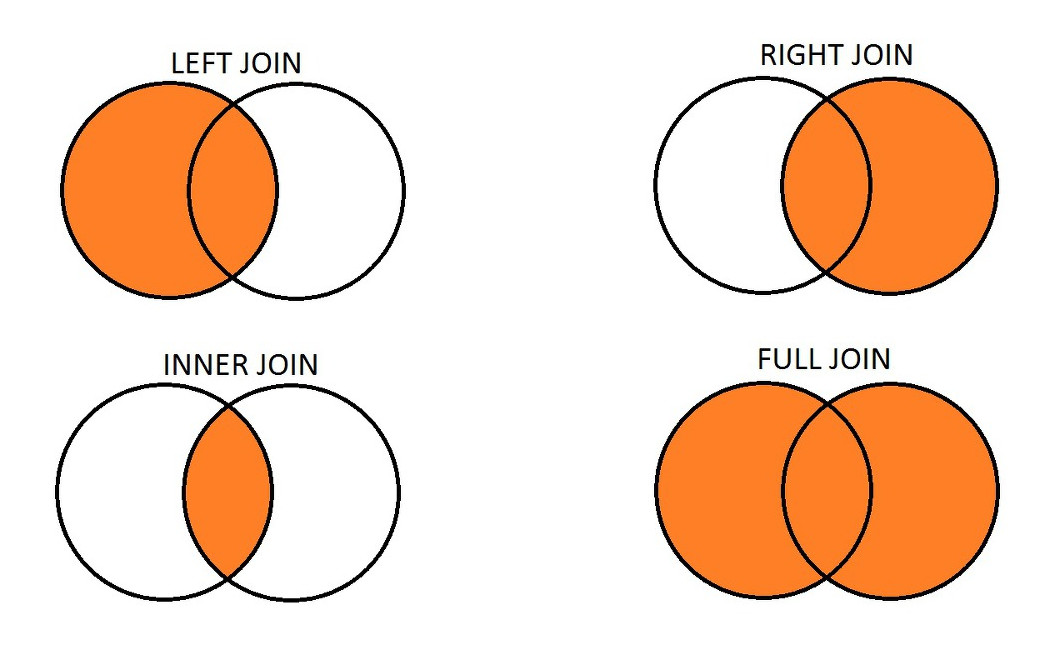

In [61]:
# pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, 
#              suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)


df14 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df15 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})

df14

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [62]:
df15

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [63]:
pd.merge(left=df14, right=df15, left_on=['lkey'], right_on=['rkey'])

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [64]:
df16 = pd.DataFrame({
    "city": ["new york","chicago","orlando"],
    "temperature": [21,14,35],
})
df16

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35


In [65]:
df17 = pd.DataFrame({
    "city": ["chicago","new york","orlando"],
    "humidity": [65,68,75],
})
df17

,city,humidity
0,chicago,65
1,new york,68
2,orlando,75


In [66]:
pd.merge(left=df16, right=df17, on='city')

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [67]:
df18 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35, 38],
})
df18

,city,temperature
0,new york,21
1,chicago,14
2,orlando,35
3,baltimore,38


In [68]:
df19 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "humidity": [65,68,71],
})
df19

,city,humidity
0,chicago,65
1,new york,68
2,san diego,71


In [69]:
pd.merge(left=df18, right=df19, on='city', how='inner')

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65


In [71]:
pd.merge(left=df18, right=df19, on='city', how='outer')

,city,temperature,humidity
0,new york,21.0,68.0
1,chicago,14.0,65.0
2,orlando,35.0,NaN
3,baltimore,38.0,NaN
4,san diego,NaN,71.0


In [72]:
pd.merge(left=df18, right=df19, on='city', how='left')

,city,temperature,humidity
0,new york,21,68.0
1,chicago,14,65.0
2,orlando,35,NaN
3,baltimore,38,NaN


In [73]:
pd.merge(left=df18, right=df19, on='city', how='right')

,city,temperature,humidity
0,chicago,14.0,65
1,new york,21.0,68
2,san diego,NaN,71


In [76]:
pd.merge(left=df18, right=df19, on='city', how='outer', indicator=True)

,city,temperature,humidity,_merge
0,new york,21.0,68.0,both
1,chicago,14.0,65.0,both
2,orlando,35.0,NaN,left_only
3,baltimore,38.0,NaN,left_only
4,san diego,NaN,71.0,right_only


In [77]:
df20 = pd.DataFrame({
    "city": ["new york","chicago","orlando", "baltimore"],
    "temperature": [21,14,35,38],
    "humidity": [65,68,71, 75]
})
df20

,city,temperature,humidity
0,new york,21,65
1,chicago,14,68
2,orlando,35,71
3,baltimore,38,75


In [78]:
df21 = pd.DataFrame({
    "city": ["chicago","new york","san diego"],
    "temperature": [21,14,35],
    "humidity": [65,68,71]
})
df21

,city,temperature,humidity
0,chicago,21,65
1,new york,14,68
2,san diego,35,71


In [80]:
pd.merge(left=df20, right=df21, on="city", how="outer", suffixes=('_first','_second'))

,city,temperature_first,humidity_first,temperature_second,humidity_second
0,new york,21.0,65.0,14.0,68.0
1,chicago,14.0,68.0,21.0,65.0
2,orlando,35.0,71.0,NaN,NaN
3,baltimore,38.0,75.0,NaN,NaN
4,san diego,NaN,NaN,35.0,71.0


### 11) pandas.merge_ordered

### 12) pandas.merge_asof

### 13) pandas.factorize

### 14) pandas.wide_to_long

## Top-level missing data

### 1) pandas.isna

In [84]:
pd.isna('dog')

False

In [85]:
pd.isna(np.nan)

True

In [86]:
array = np.array([[1, np.nan, 3], [4, 5, np.nan]])
array

array([[ 1., nan,  3.],
       [ 4.,  5., nan]])

In [87]:
pd.isna(array)

array([[False,  True, False],
       [False, False,  True]])

In [82]:
df = pd.read_csv('Dataset/weather_data.csv')
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [83]:
df = pd.read_csv('Dataset/weather_data.csv', parse_dates=['day'])
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [88]:
pd.isna(obj=df)

,day,temperature,windspeed,event
0,False,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,True,False,True
4,False,False,True,False
5,False,True,True,False
6,False,True,True,True
7,False,False,False,False
8,False,False,False,False


### 2) pandas.isnull

In [89]:
pd.isnull(obj=df)

,day,temperature,windspeed,event
0,False,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,True,False,True
4,False,False,True,False
5,False,True,True,False
6,False,True,True,True
7,False,False,False,False
8,False,False,False,False


### 3) pandas.notna

In [90]:
pd.notna(obj=df)

,day,temperature,windspeed,event
0,True,True,True,True
1,True,False,True,True
2,True,True,False,True
3,True,False,True,False
4,True,True,False,True
5,True,False,False,True
6,True,False,False,False
7,True,True,True,True
8,True,True,True,True


### 4) pandas.notnull

In [91]:
pd.notnull(obj=df)

,day,temperature,windspeed,event
0,True,True,True,True
1,True,False,True,True
2,True,True,False,True
3,True,False,True,False
4,True,True,False,True
5,True,False,False,True
6,True,False,False,False
7,True,True,True,True
8,True,True,True,True


## Top-level dealing with numeric data

### 1) pandas.to_numeric

In [92]:
# pandas.to_numeric(arg, errors='raise', downcast=None)

# Convert argument to a numeric type.

# The default return dtype is float64 or int64 depending on the data supplied. Use the downcast parameter to obtain other dtypes


s = pd.Series(['1.0', '2', -3])

s

0    1.0
1      2
2     -3
dtype: object

In [93]:
pd.to_numeric(arg=s)

0    1.0
1    2.0
2   -3.0
dtype: float64

In [94]:
pd.to_numeric(s, downcast='float')

0    1.0
1    2.0
2   -3.0
dtype: float32

In [95]:
pd.to_numeric(s, downcast='signed')

0    1
1    2
2   -3
dtype: int8

In [96]:
ser = pd.Series(['Eleven', 11, 21, 19]) 
num = pd.to_numeric(ser, errors='ignore')
print(num)

0    Eleven
1        11
2        21
3        19
dtype: object


## Top-level dealing with datetimelike data

##### to_datetime(arg[, errors, dayfirst, ...])

Convert argument to datetime.

to_timedelta(arg[, unit, errors])

Convert argument to timedelta.

date_range([start, end, periods, freq, tz, ...])

Return a fixed frequency DatetimeIndex.

bdate_range([start, end, periods, freq, tz, ...])

Return a fixed frequency DatetimeIndex, with business day as the default frequency.

period_range([start, end, periods, freq, name])

Return a fixed frequency PeriodIndex.

timedelta_range([start, end, periods, freq, ...])

Return a fixed frequency TimedeltaIndex, with day as the default frequency.

infer_freq(index[, warn])

Infer the most likely frequency given the input index.

## Top-level dealing with Interval data

### 1) pandas.interval_range

In [97]:
# pandas.interval_range(start=None, end=None, periods=None, freq=None, name=None, closed='right')

pd.interval_range(start=0, end=5)

IntervalIndex([(0, 1], (1, 2], (2, 3], (3, 4], (4, 5]], dtype='interval[int64, right]')

In [98]:
# Additionally, datetime-like input is also supported.

pd.interval_range(start=pd.Timestamp('2017-01-01'), end=pd.Timestamp('2017-01-04'))

IntervalIndex([(2017-01-01, 2017-01-02], (2017-01-02, 2017-01-03], (2017-01-03, 2017-01-04]], dtype='interval[datetime64[ns], right]')